In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
df = pd.DataFrame(data.data,columns = data.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df['target'] = data.target

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df = df[['CRIM','RM','LSTAT']]

In [11]:
df.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [12]:
df.isnull().sum()

CRIM     0
RM       0
LSTAT    0
dtype: int64

In [13]:
import scipy.stats as stats

In [14]:
def fun(df,var):
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    df[var].hist(bins = 30)
    plt.subplot(1,3,2)
    stats.probplot(df[var],dist='norm',plot = plt)
    plt.subplot(1,3,3)
    sns.boxplot(y = df[var])
    plt.ylabel("values")
    plt.show()

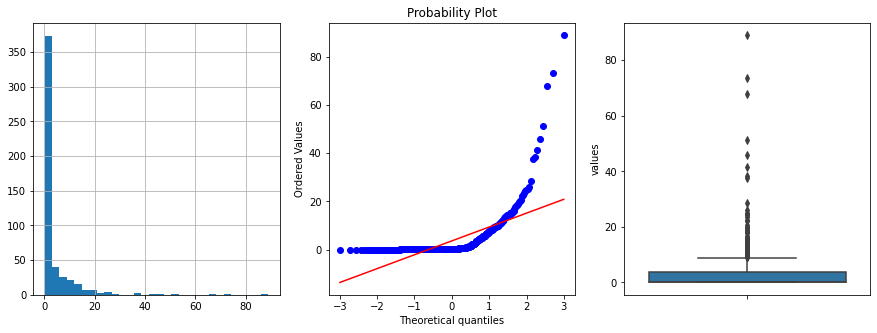

In [15]:
fun(df,'CRIM')

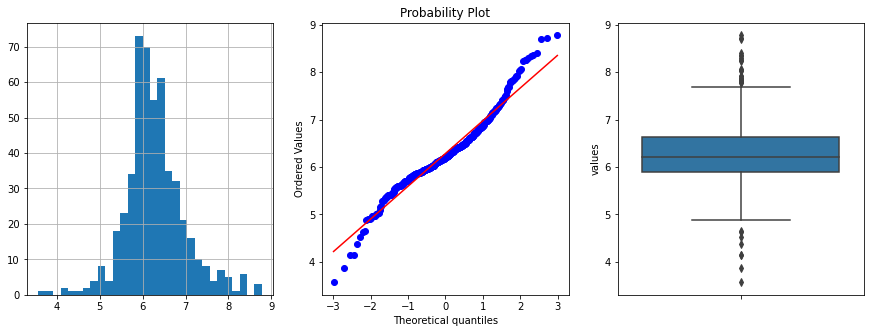

In [16]:
fun(df,'RM')

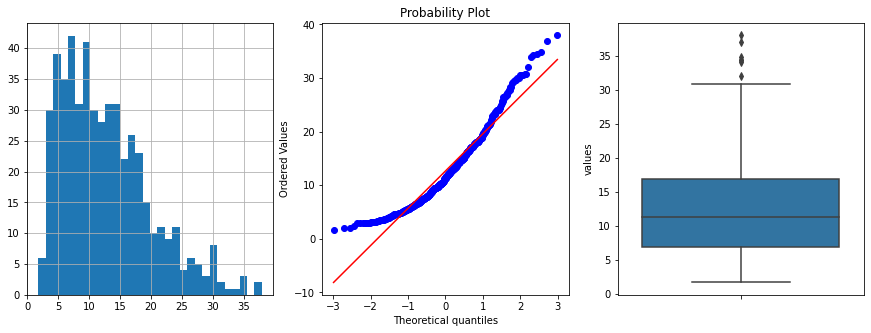

In [17]:
fun(df,'LSTAT')

### capping


In [18]:
def iqr(df,var,value):
    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    
    upper = df[var].quantile(0.75) + (IQR * value)
    
    lower = df[var].quantile(0.25) - (IQR * value)
    
    return upper , lower

In [19]:
upper_limit_lstat , lower_limit_lstat = iqr(df,'LSTAT',1.5)
upper_limit_lstat,lower_limit_lstat

(31.962500000000006, -8.057500000000005)

In [20]:
upper_limit_rm , lower_limit_rm = iqr(df,'RM',1.5)
upper_limit_rm,lower_limit_rm

(7.730500000000001, 4.778499999999999)

In [21]:
upper_limit_crim , lower_limit_crim = iqr(df,'CRIM',1.5)
upper_limit_crim,lower_limit_crim

(9.06963875, -5.31051125)

In [22]:
df['LSTAT'] = np.where(df['LSTAT'] > upper_limit_lstat , upper_limit_lstat , 
                         np.where(df['LSTAT'] < lower_limit_lstat , lower_limit_lstat , df['LSTAT']))

In [23]:
df['RM'] = np.where(df['RM'] > upper_limit_rm , upper_limit_rm , 
                         np.where(df['RM'] < lower_limit_rm , lower_limit_rm , df['RM']))

In [24]:
df['CRIM'] = np.where(df['CRIM'] > upper_limit_crim , upper_limit_crim , 
                         np.where(df['CRIM'] < lower_limit_crim , lower_limit_crim , df['CRIM']))

In [25]:
df.shape

(506, 3)

In [26]:
def fun(data,var):
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    data[var].hist(bins = 30)
    plt.subplot(1,3,2)
    stats.probplot(data[var],dist='norm',plot = plt)
    plt.subplot(1,3,3)
    sns.boxplot(y = data[var])
    plt.ylabel("values")
    plt.show()

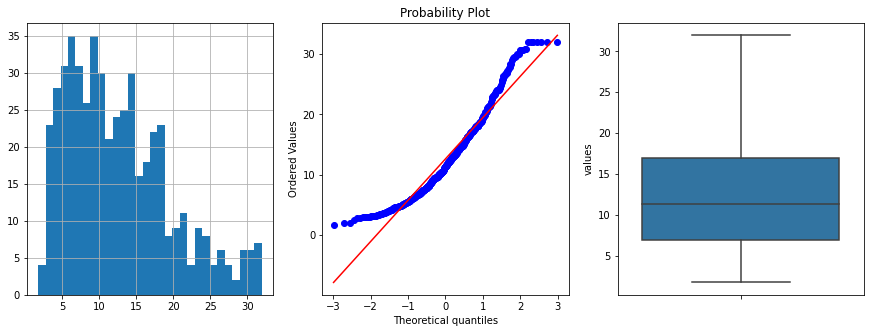

In [27]:
fun(df,'LSTAT')

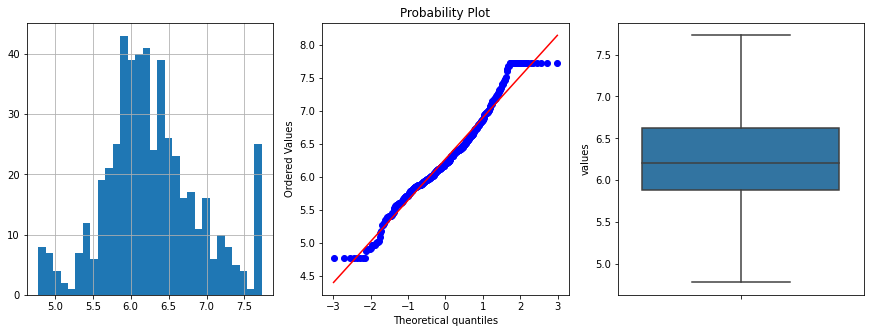

In [28]:
fun(df,'RM')

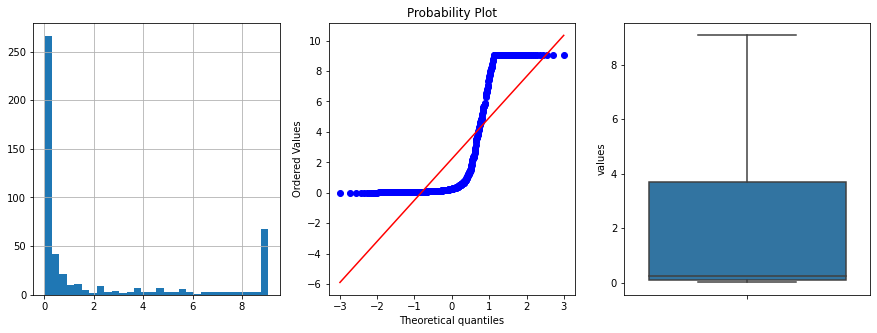

In [29]:
fun(df,'CRIM')

### Using Feature engine 

In [30]:
from feature_engine.outliers import Winsorizer

In [31]:
reg = Winsorizer(capping_method='iqr',tail='both',fold = 1.5 ,variables=['RM'])

In [32]:
reg.fit(df)

Winsorizer(capping_method='iqr', fold=1.5, tail='both', variables=['RM'])

In [33]:
reg.left_tail_caps_

{'RM': 4.778499999999999}

In [34]:
reg.right_tail_caps_

{'RM': 7.730500000000001}

In [35]:
data = reg.transform(df)

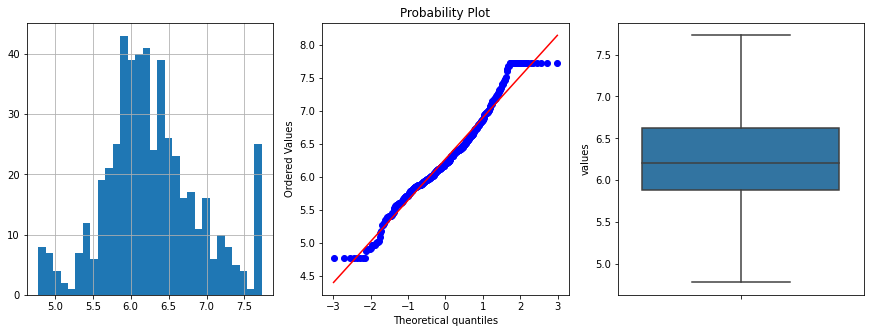

In [36]:
fun(df,'RM')

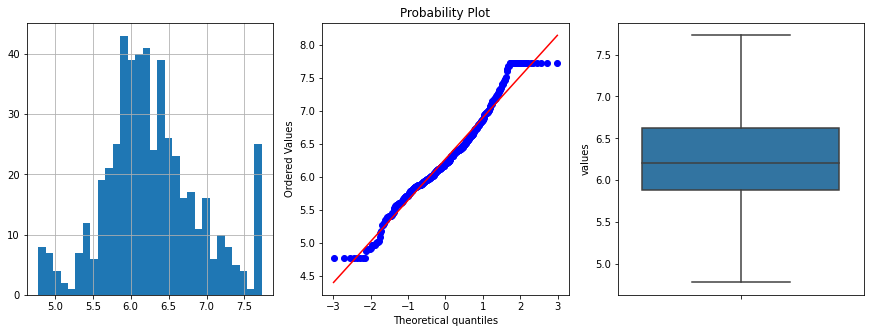

In [37]:
fun(data,'RM')